In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [19]:
url = 'https://raw.githubusercontent.com/Rgardineer/DataMiningProject/master/malefemalecovid.csv'
dataset2 = pd.read_csv(url)
dataset2.head(10)
# Dataset is now stored in a Pandas Dataframe

,Country,Date,Cases,Cases (% male),Cases (% female),Deaths,deaths (% male),deaths (% female),Male Case Count,Female Case Count,Male Death Count,Female Death Count
0,Greece,04.05.20,2421,0.55,0.45,134,0.80,0.20,1331,1089,NaN,NaN
1,Thailand,05.05.20,2987,0.54,0.46,55,0.76,0.24,1024,1963,NaN,NaN
2,Dominican Republic,03.05.20,8235,0.54,0.46,346,0.73,0.27,4446,3788,NaN,NaN
3,The Netherlands,05.05.20,41034,0.37,0.63,5168,0.56,0.44,15182,25851,NaN,NaN
4,Romania,03.05.20,13552,0.44,0.56,803,0.62,0.38,5962,7589,NaN,NaN
5,Denmark,06.05.20,9938,0.42,0.58,506,0.58,0.42,4173,5764,NaN,NaN
6,Belgium,05.05.20,50320,0.37,0.63,5647,0.51,0.49,18618,31701,NaN,NaN
7,Italy,28.04.20,199035,0.47,0.53,25215,0.62,0.38,93546,105488,NaN,NaN
8,Spain,04.05.20,216254,0.44,0.56,17189,0.58,0.42,95151,121102,NaN,NaN
9,China,28.02.20,55924,0.51,0.49,2114,0.64,0.36,28521,27402,NaN,NaN


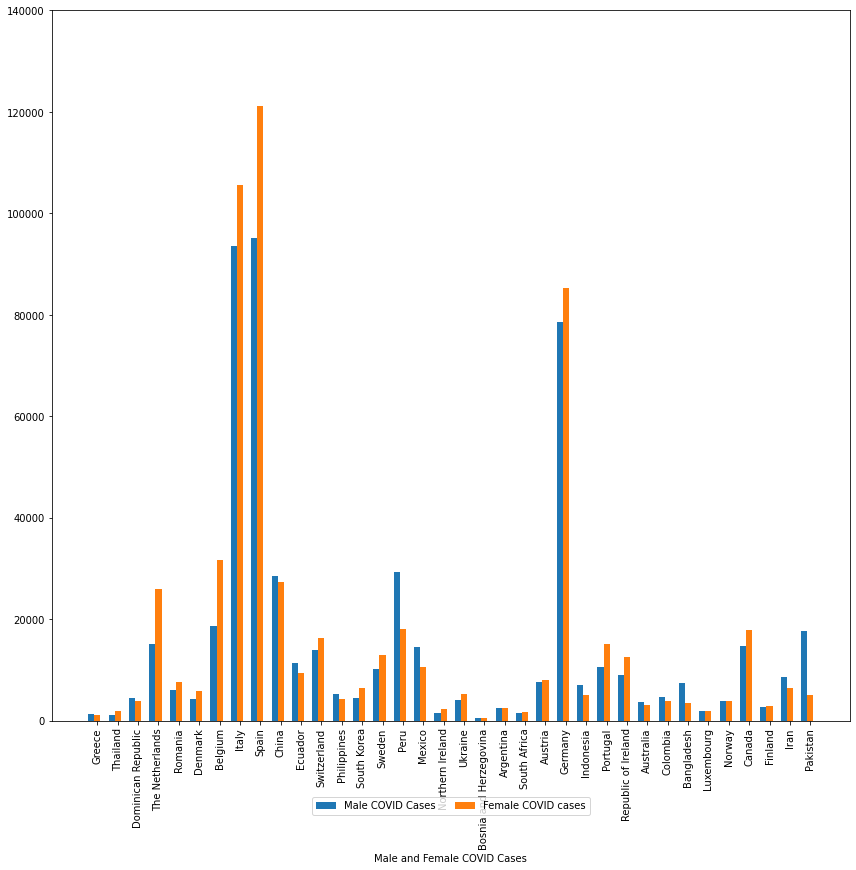

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,12))
names = dataset2['Country'].values
x = np.arange(len(names))
w = 0.3
plt.bar(x-w, dataset2['Male Case Count'].values, width=w, label='Male COVID Cases')
plt.bar(x, dataset2['Female Case Count'].values, width=w, label='Female COVID cases')
plt.xticks(x, names, rotation='vertical')
plt.ylim([0,140000])
plt.tight_layout()
plt.xlabel('Male and Female COVID Cases')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=5)
plt.savefig("CSVBarplots.png", bbox_inches="tight")
plt.show()

In [21]:

dataset2["MaleDeaths"] = dataset2["Deaths"] * dataset2["deaths (% male)"] 
dataset2["FemaleDeaths"] = dataset2["Deaths"] * dataset2["deaths (% female)"]
dataset2["MaleCases"] = dataset2["Cases"] * dataset2["Cases (% male)"]
dataset2["FemaleCases"] = dataset2["Cases"] * dataset2["Cases (% female)"] 
print(dataset2)

                   Country      Date  ...  MaleCases  FemaleCases
0                   Greece  04.05.20  ...    1331.55      1089.45
1                 Thailand  05.05.20  ...    1612.98      1374.02
2       Dominican Republic  03.05.20  ...    4446.90      3788.10
3          The Netherlands  05.05.20  ...   15182.58     25851.42
4                  Romania  03.05.20  ...    5962.88      7589.12
5                  Denmark  06.05.20  ...    4173.96      5764.04
6                  Belgium  05.05.20  ...   18618.40     31701.60
7                    Italy  28.04.20  ...   93546.45    105488.55
8                    Spain  04.05.20  ...   95151.76    121102.24
9                    China  28.02.20  ...   28521.24     27402.76
10                 Ecuador  03.05.20  ...   11416.35      9340.65
11             Switzerland  06.05.20  ...   13827.60     16232.40
12             Philippines  04.05.20  ...    5216.75      4268.25
13             South Korea  05.05.20  ...    4429.64      6374.36
14        

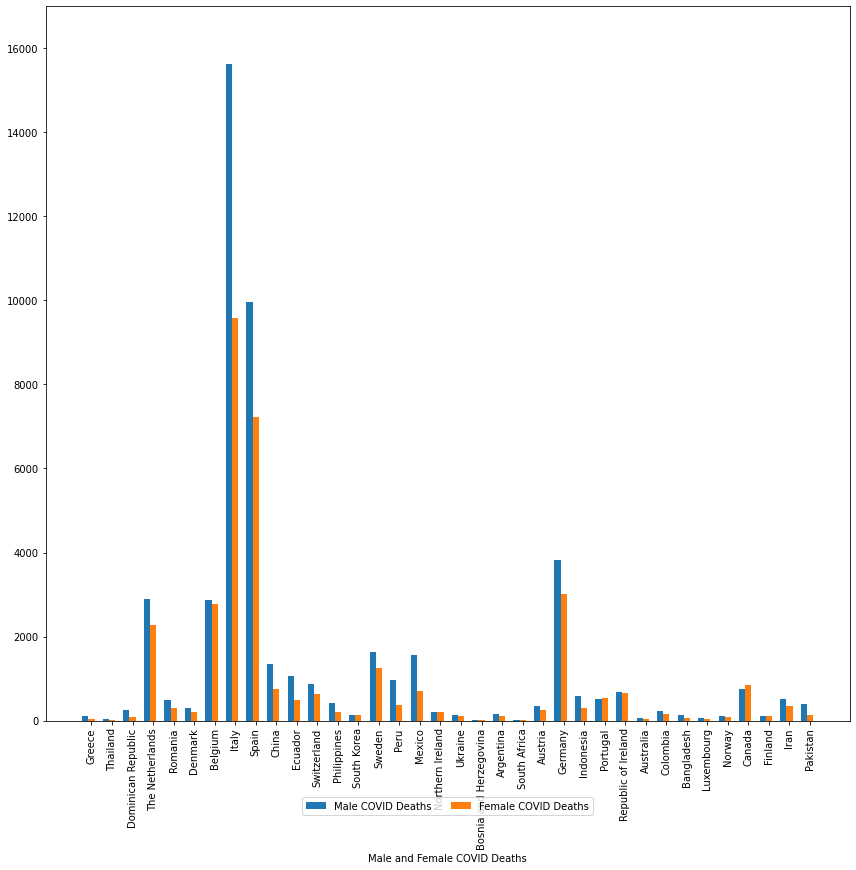

In [22]:
plt.figure(figsize=(12,12))
names = dataset2['Country'].values
x = np.arange(len(names))
w = 0.3
plt.bar(x-w, dataset2['MaleDeaths'].values, width=w, label='Male COVID Deaths')
plt.bar(x, dataset2['FemaleDeaths'].values, width=w, label='Female COVID Deaths')
plt.xticks(x, names, rotation='vertical')
plt.ylim([0,17000])
plt.tight_layout()
plt.xlabel('Male and Female COVID Deaths')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=5)
plt.savefig("CSVBarplots.png", bbox_inches="tight")
plt.show()

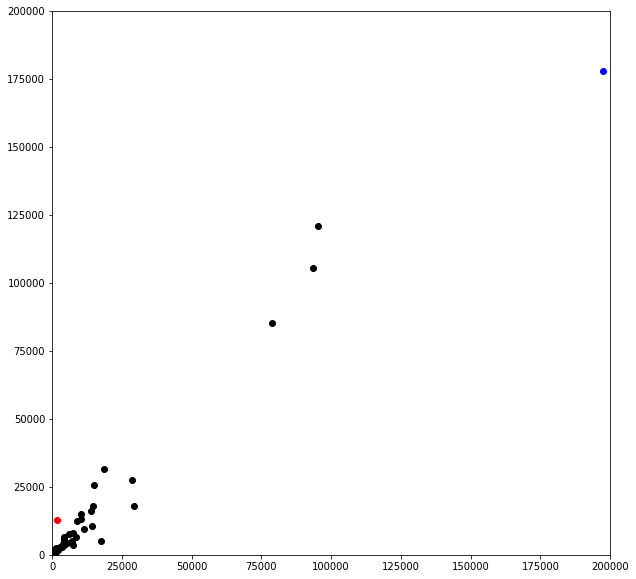

In [23]:
np.random.seed(200)
k = 2
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 200000), np.random.randint(0, 200000)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(10, 10))
plt.scatter(dataset2['Male Case Count'], dataset2['Female Case Count'], color='k')
colmap = {1: 'r', 2: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,200000)
plt.ylim(0, 200000)
plt.show()

              Country      Date  Cases  ...  distance_from_2  closest  color
0              Greece  04.05.20   2421  ...    263975.957778        1      r
1            Thailand  05.05.20   2987  ...    263620.129884        1      r
2  Dominican Republic  03.05.20   8235  ...    259855.141179        1      r
3     The Netherlands  05.05.20  41034  ...    237283.096988        1      r
4             Romania  03.05.20  13552  ...    256189.834818        1      r

[5 rows x 20 columns]


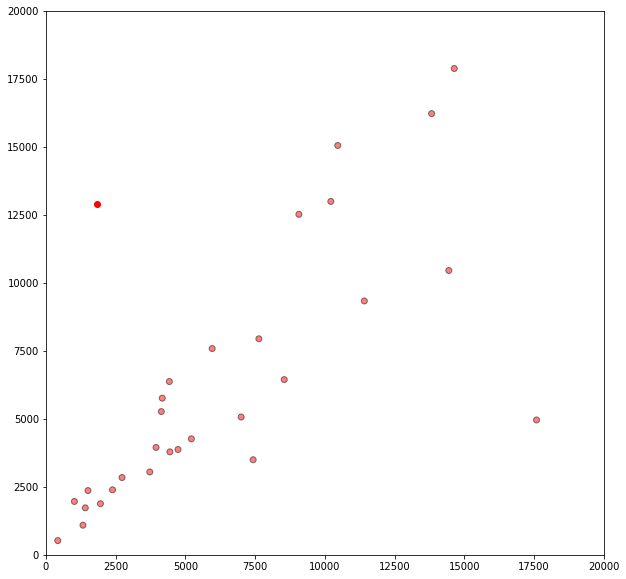

In [24]:
def assignment(dataset2, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
      dataset2['distance_from_{}'.format(i)] = (
            np.sqrt(
                (dataset2['Male Case Count'] - centroids[i][0]) ** 2
                + (dataset2['Female Case Count'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    dataset2['closest'] =dataset2.loc[:, centroid_distance_cols].idxmin(axis=1)
    dataset2['closest'] = dataset2['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    dataset2['color'] = dataset2['closest'].map(lambda x: colmap[x])
    return dataset2

dataset2 = assignment(dataset2, centroids)
print(dataset2.head())

fig = plt.figure(figsize=(10, 10))
plt.scatter(dataset2['Male Case Count'], dataset2['Female Case Count'], color = dataset2['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,20000)
plt.ylim(0,20000)
plt.show()

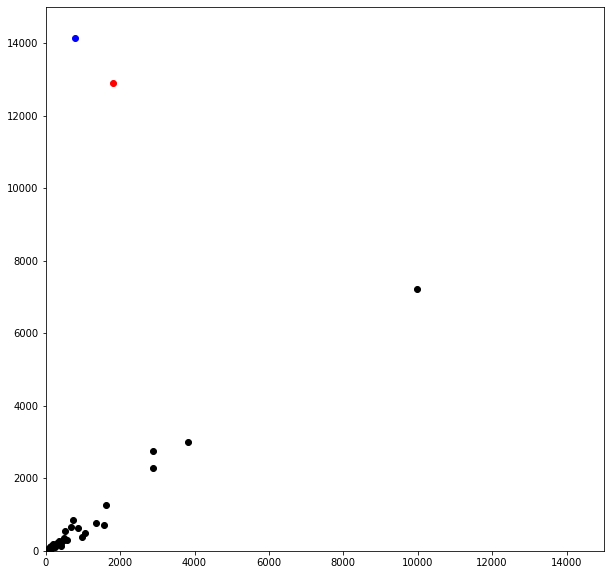

In [25]:
np.random.seed(200)
k = 2
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 2000), np.random.randint(0, 15000)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(10, 10))
plt.scatter(dataset2['MaleDeaths'], dataset2['FemaleDeaths'], color='k')
colmap = {1: 'r', 2: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 15000)
plt.ylim(0, 15000)
plt.show()

              Country      Date  Cases  ...  distance_from_2  closest  color
0              Greece  04.05.20   2421  ...     14137.409511        1      r
1            Thailand  05.05.20   2987  ...     14154.272566        1      r
2  Dominican Republic  03.05.20   8235  ...     14064.623215        1      r
3     The Netherlands  05.05.20  41034  ...     12060.108352        1      r
4             Romania  03.05.20  13552  ...     13845.817025        1      r

[5 rows x 20 columns]


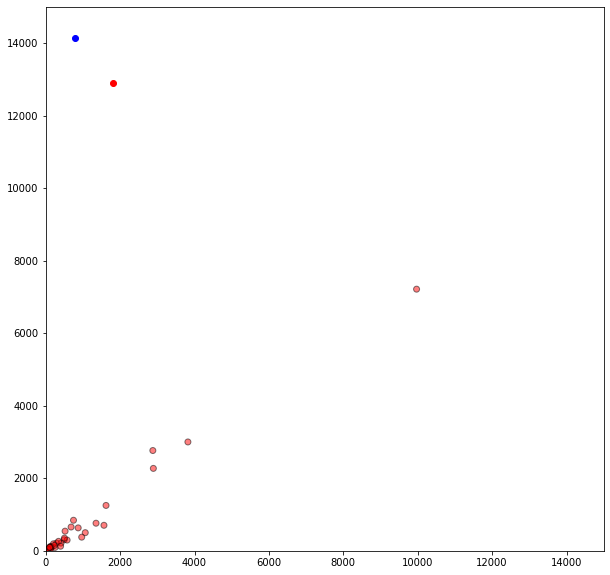

In [26]:
def assignment(dataset2, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
      dataset2['distance_from_{}'.format(i)] = (
            np.sqrt(
                (dataset2['MaleDeaths'] - centroids[i][0]) ** 2
                + (dataset2['FemaleDeaths'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    dataset2['closest'] =dataset2.loc[:, centroid_distance_cols].idxmin(axis=1)
    dataset2['closest'] = dataset2['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    dataset2['color'] = dataset2['closest'].map(lambda x: colmap[x])
    return dataset2

dataset2 = assignment(dataset2, centroids)
print(dataset2.head())

fig = plt.figure(figsize=(10, 10))
plt.scatter(dataset2['MaleDeaths'], dataset2['FemaleDeaths'], color = dataset2['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,15000)
plt.ylim(0,15000)
plt.show()

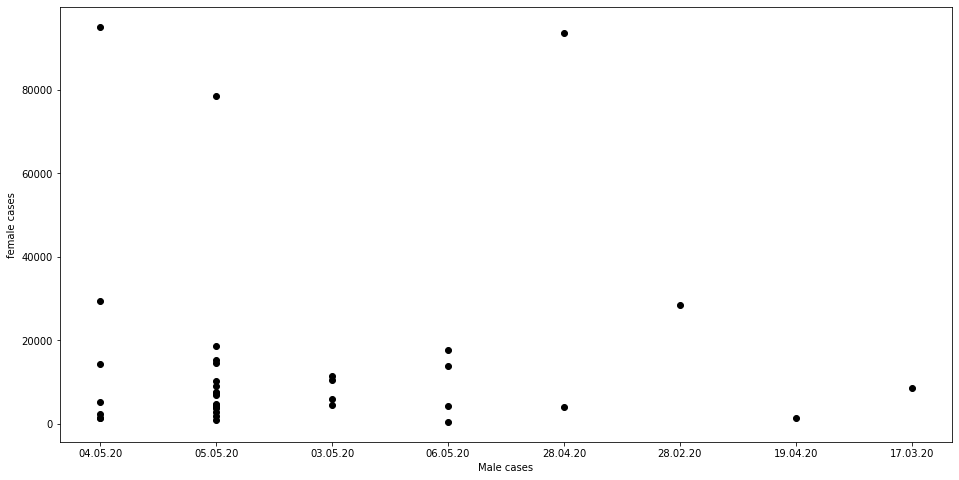

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
dataset2.drop(['Country'], axis=1)
plt.figure(figsize=(16, 8))
plt.scatter(
    dataset2['Date'],
     dataset2['Male Case Count'],
    c='black'
)
plt.xlabel("Male cases")
plt.ylabel("female cases")
plt.show()


In [28]:
X = dataset2['Male Case Count'].values.reshape(-1,1)
y = dataset2['Female Case Count'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = -1041.1 + 1.1624X


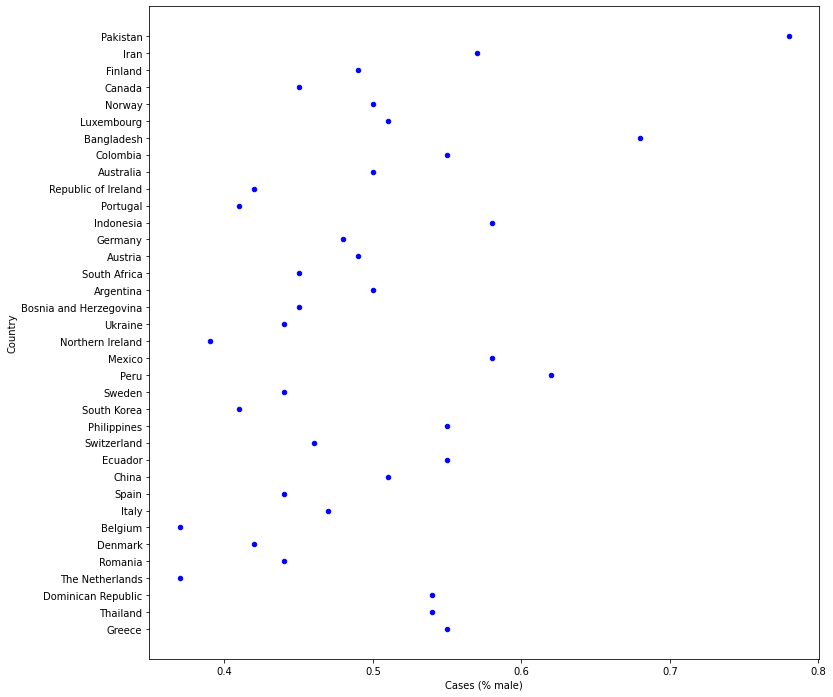

In [29]:

dataset2.plot(kind='scatter',x='Cases (% male)',y='Country', figsize=(12, 12), color="blue")


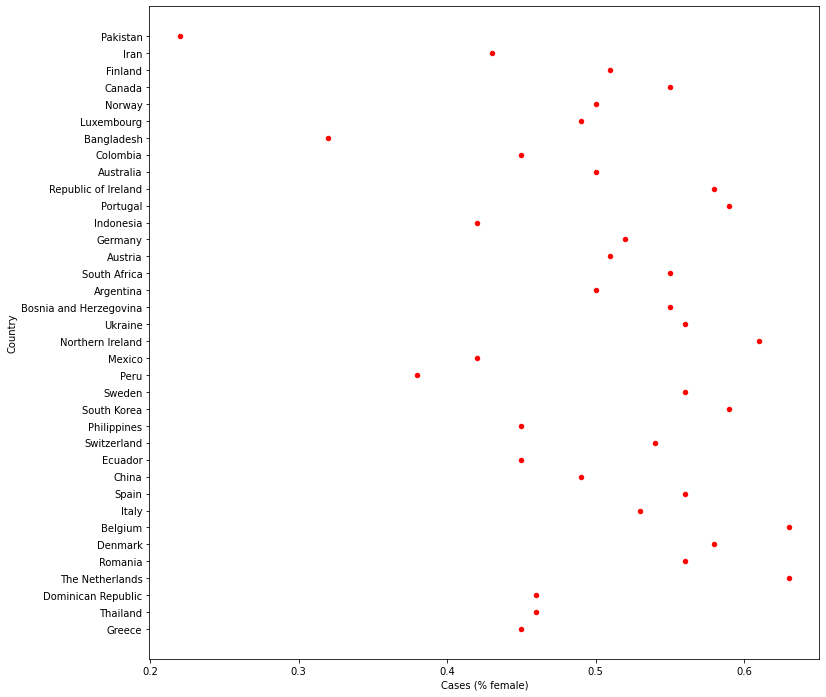

In [30]:

dataset2.plot(kind='scatter',x='Cases (% female)',y='Country', figsize=(12, 12), color="red")



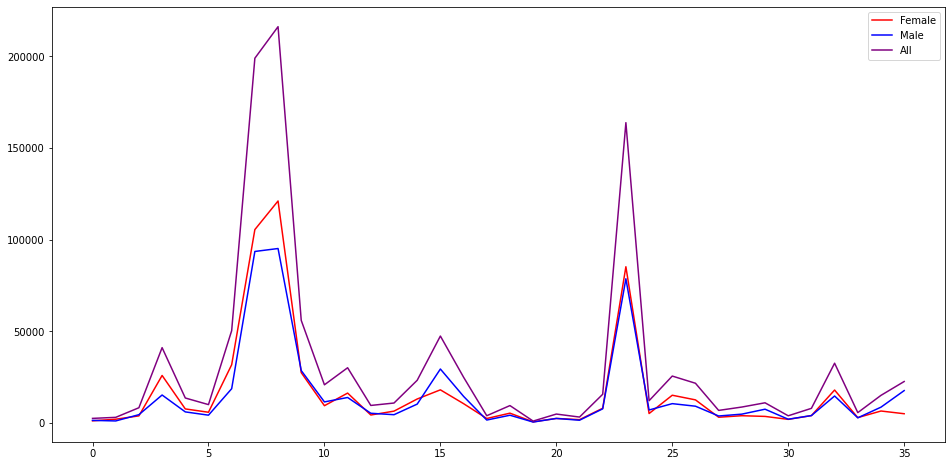

In [31]:
plt.figure(figsize=(16, 8))

y = dataset2['Female Case Count']
y1 = dataset2['Male Case Count']
y2 = dataset2['Cases']
plt.plot(y, color='red', label='Female')
plt.plot(y1, color='blue', label='Male')
plt.plot(y2, color='purple', label='All')
plt.legend()

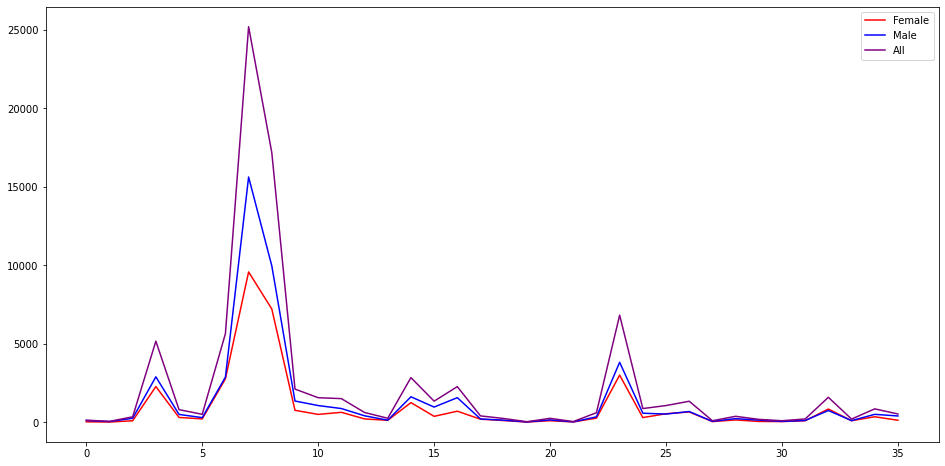

In [32]:
plt.figure(figsize=(16, 8))

y = dataset2['FemaleDeaths']
y1 = dataset2['MaleDeaths']
y2 = dataset2['Deaths']
plt.plot(y, color='red', label='Female')
plt.plot(y1, color='blue', label='Male')
plt.plot(y2, color='purple', label='All')
plt.legend()